Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading Dataset:
df=pd.read_csv('C:/Users/Azhar1/Documents/FlipRobo/Project_Evaluation/Project_Phase 3/weatherAUS.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(8425, 23)

The dimension of our data is 8425 rows * 23 columns

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

We can see that the data is having float and object data types.

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [9]:
#printing the unique values available in the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('*'*75)

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
***************************************************************************
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
***************************************************************************
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
***************************************************************************
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9

In [7]:
#checking the number of null values present in each columns 

df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

We can see that except in date and location columns, all other columns are having null values.

Let us fill null values now.

In [8]:
df["MinTemp"]=df["MinTemp"].replace('N',np.nan)

In [9]:
df['MinTemp']= df['MinTemp'].fillna(df['MinTemp'].mean())

In [10]:
df['MaxTemp']= df['MaxTemp'].fillna(df['MaxTemp'].mean())

df['Rainfall']= df['Rainfall'].fillna(df['Rainfall'].mean())

df['Evaporation']= df['Evaporation'].fillna(df['Evaporation'].mean())

df['Sunshine']= df['Sunshine'].fillna(df['Sunshine'].mean())

df['WindGustSpeed']= df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

df['WindSpeed9am']= df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

df['WindSpeed3pm']= df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

df['Humidity9am']= df['Humidity9am'].fillna(df['Humidity9am'].mean())

df['Humidity3pm']= df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

df['Pressure9am']= df['Pressure9am'].fillna(df['Pressure9am'].mean())

df['Pressure3pm']= df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

df['Cloud9am']= df['Cloud9am'].fillna(df['Cloud9am'].mean())

df['Cloud3pm']= df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

df['Temp9am']= df['Temp9am'].fillna(df['Temp9am'].mean())

df['Temp3pm']= df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [11]:
null_columns =['WindGustDir','WindDir9am','WindDir3pm']
for i in null_columns:
    df.fillna(df[i].mode()[0], inplace=True)

In [12]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
N       239
Name: RainTomorrow, dtype: int64

In [13]:
df["RainToday"]=df["RainToday"].replace('N',np.nan)

In [14]:
df["RainTomorrow"]=df["RainTomorrow"].replace('N',np.nan)

In [15]:
df['RainToday']= df['RainToday'].fillna(df['RainToday'].mode()[0])

In [16]:
df['RainTomorrow']= df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [17]:
#Verifying for null values:

df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [19]:
# Drop Date column:
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


# Data Visualization

<Axes: >

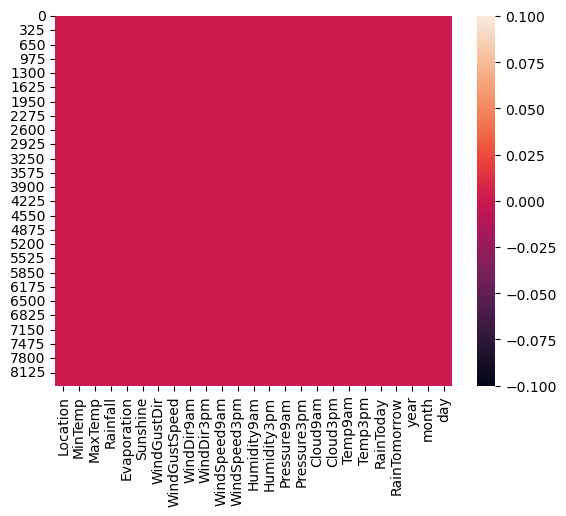

In [26]:
sns.heatmap(df.isnull())

No null vaues presented graphically.

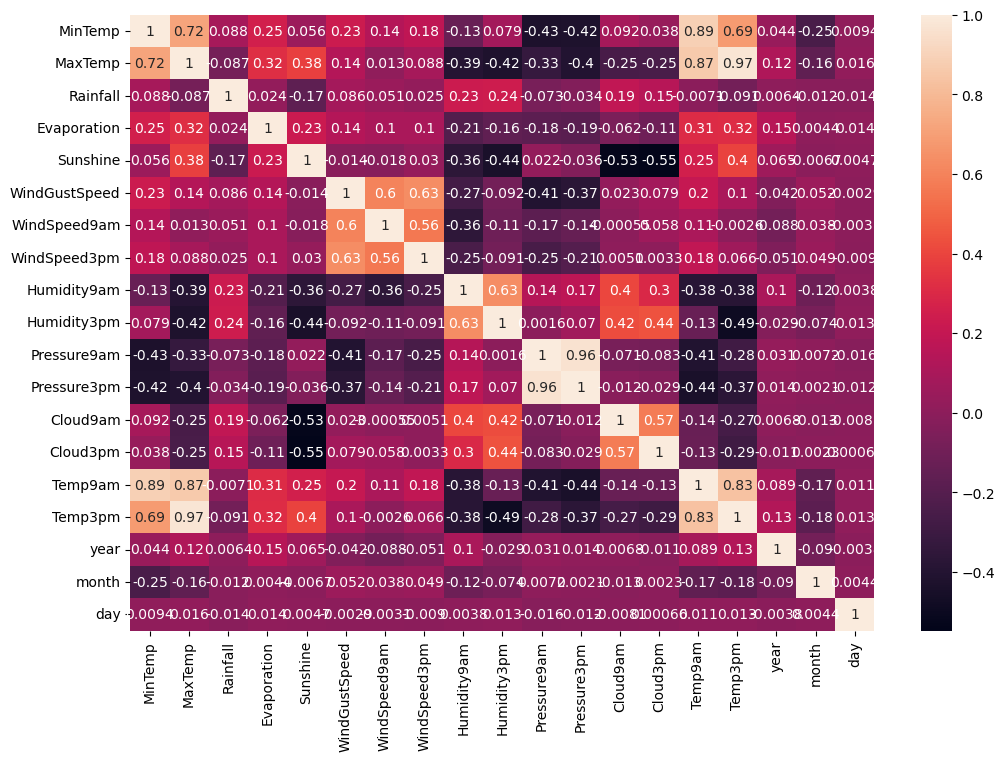

In [27]:
#Showing the attributes are related to each other can be seen by plotting the heatmap over the attributes correlation value
corr = df.corr()
plt.figure(figsize=(12,8), facecolor='white')
sns.heatmap(corr, annot=True)
plt.show()

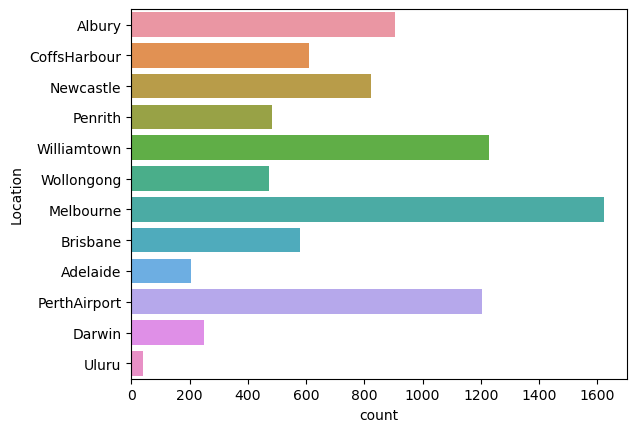

In [28]:
sns.countplot(y='Location',data=df)
plt.show()

1. Melbourne has maximum common weather station where maximum area has been coverd followed by Williamtown.
2. Uluru has lowest weather station where minimum area has been coverd followed by Adelaide.

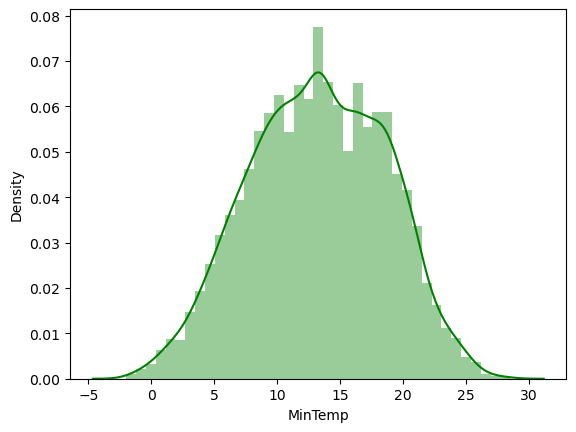

In [30]:
# Distribution plot for the column MinTemp
sns.distplot(df["MinTemp"],color="g")
plt.show()

Maximum MinTemp lies in the range of 5 to 20. Before and after that Min temprature falls down.

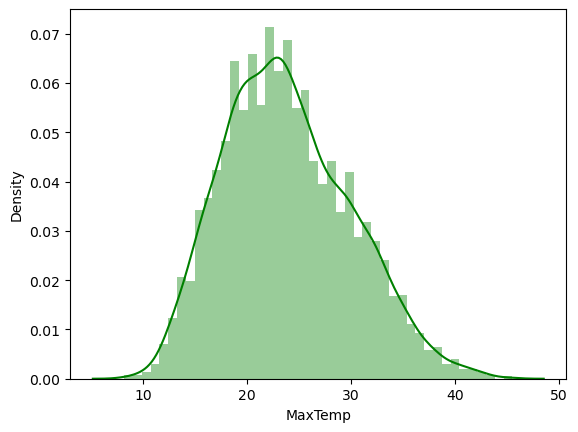

In [33]:
# Distribution plot for the column MaxTemp
sns.distplot(df["MaxTemp"],color="g")
plt.show()

Maximum MaxTemp lies in the range of 13 to 30. In which the Max temprature has maximum where from 30 Max temp falls down.

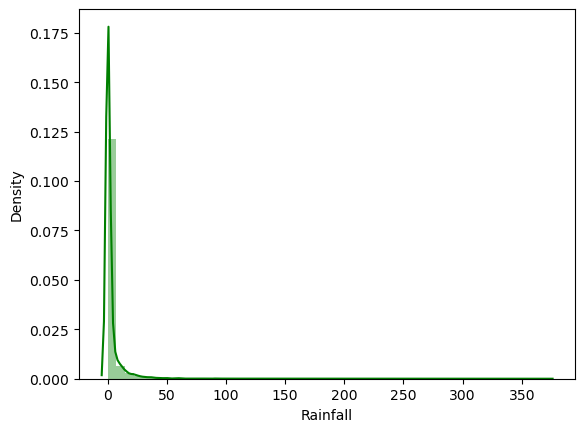

In [35]:
# Distribution plot for the column Rainfall
sns.distplot(df["Rainfall"],color="g")
plt.show()

Maximum rainsfalls in 0 to 50. After that there may be outliers.

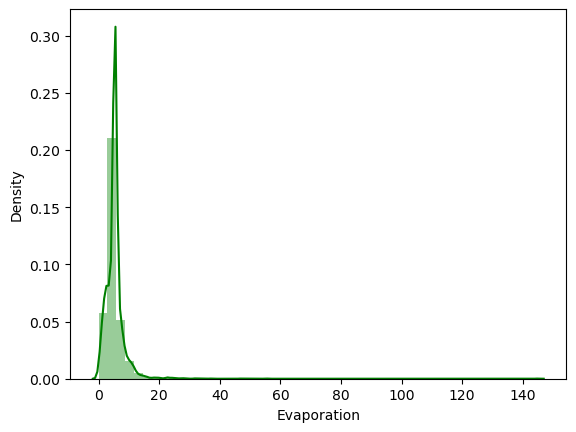

In [37]:
# Distribution plot for the column Evaporation
sns.distplot(df["Evaporation"],color="g")
plt.show()

Maximum Evaporation in 0 to 20. After that is seem to have outliers

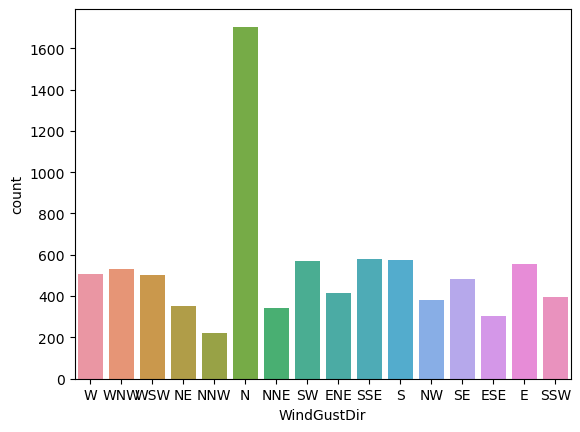

In [38]:
sns.countplot(x='WindGustDir',data=df)
plt.show()

1. The 'N' type of WindGust has a strongest wind in midnight.
2. The 'NNW' direction of WingGust has lowest wind in mindnight.

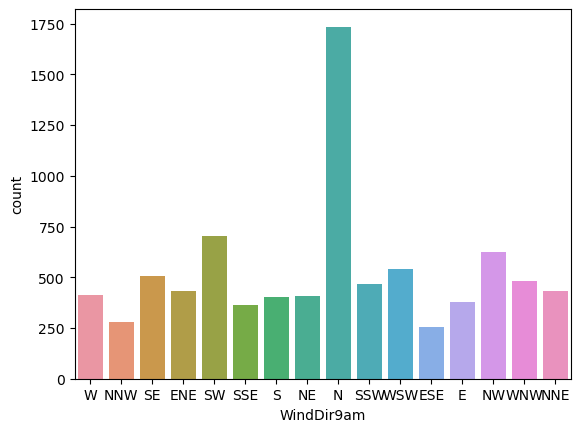

In [39]:
sns.countplot(x='WindDir9am',data=df)
plt.show()

1. "North' has maximum wind direction at 9am followed by SouthWest.
2. "SouthEast" has mimimum wind direction at 9am followed NNW.

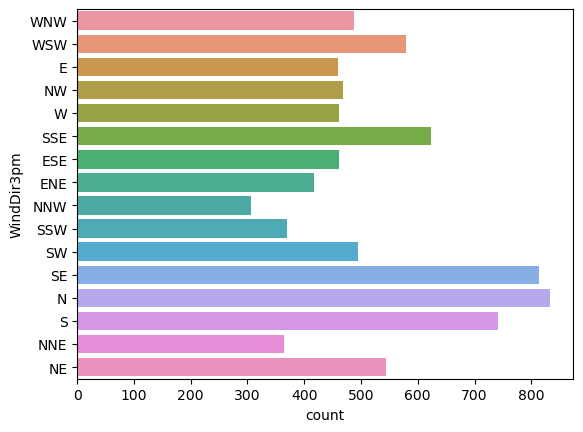

In [41]:
sns.countplot(y='WindDir3pm',data=df)
plt.show()

1. 'North' wind has maximum direction at 3am followed by South East.
2. NNW has minimum wind direction at 3am followed by SSW.

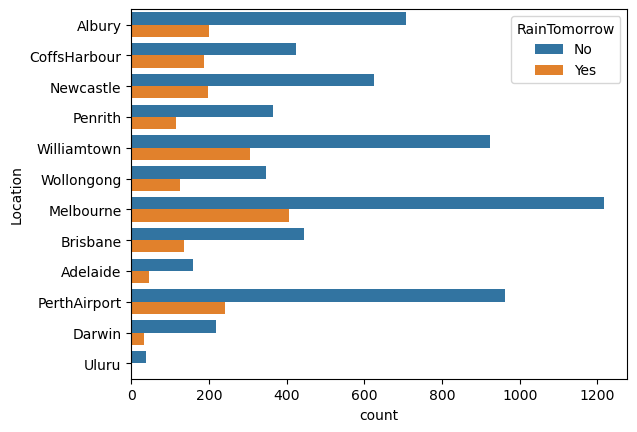

In [42]:
sns.countplot(y='Location',hue='RainTomorrow',data=df)
plt.show()

1.In Melbourne location where has maximum chance that tomorrow there is no rainfall. But Comapring to others where tomorrow having rainfall.
2. Darivin has lowest chance where tomorrow rain wiill comes.

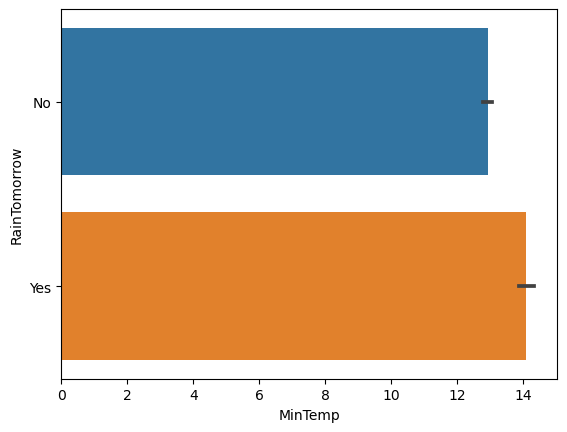

In [43]:
sns.barplot(x='MinTemp',y='RainTomorrow',data=df)
plt.show()

1. According to Min temperature, tomorrow have a chance that rainfall may possible. But at same parameter is say there also having chance that tomorrow no rainfalls.

2. But both prediction almost near to each others.

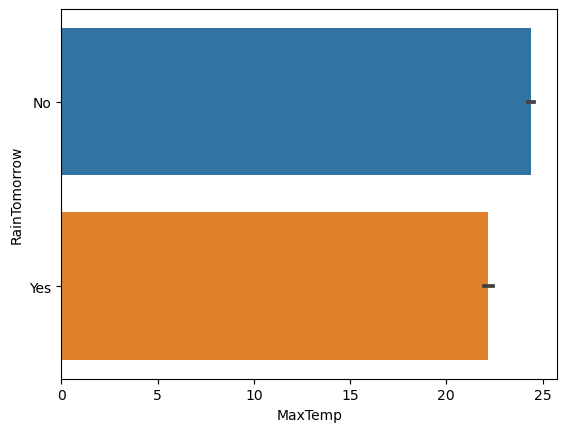

In [45]:
sns.barplot(x='MaxTemp',y='RainTomorrow',data=df)
plt.show()

By according to Max Temp tomorrow has lowest chance for rainfall. But both prediction almost near to each others.
So maximum Temperature has 22.

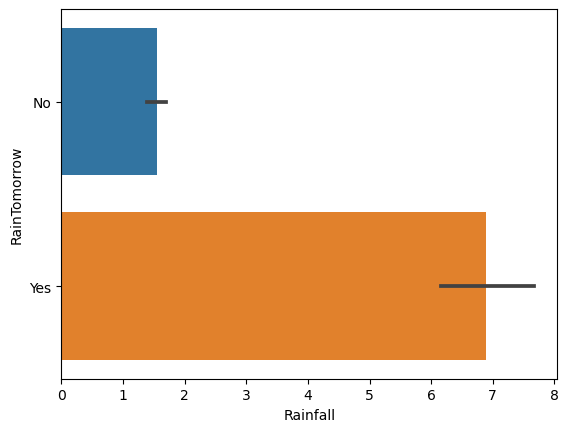

In [47]:
sns.barplot(x='Rainfall',y='RainTomorrow',data=df)
plt.show()

We can see, It show that tomorrow has maximum chance of rainfall.
Upt 7 mm rainfall may possible.

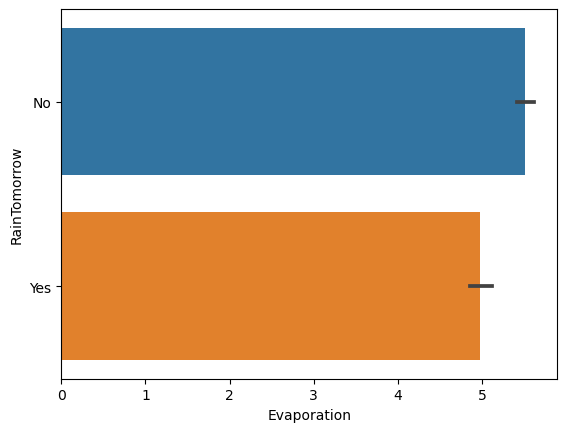

In [48]:
sns.barplot(x='Evaporation',y='RainTomorrow',data=df)
plt.show()

According to Evaporation. Tomorrow has comparatively low chance for rainfalls.
Upto 5 mm Evaporation will be tomorrow.

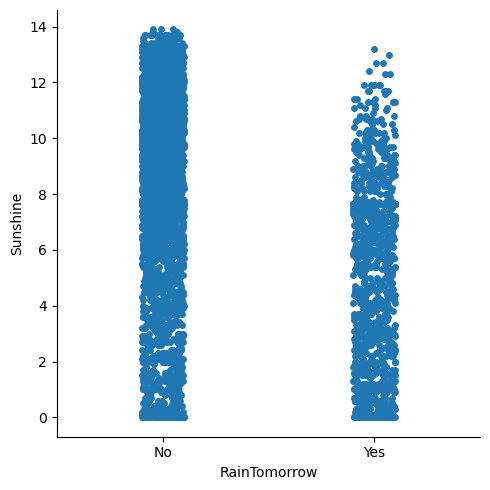

In [50]:
sns.catplot(x='RainTomorrow',y='Sunshine',data=df)
plt.show()

According to sunshine, tomorrow have comparativley high chnace for no rainfall. It means tomorrow will be no rainfall. Sky will be clean.
But comapring to Yes, It may have chance that, tomorrow will rain comes.

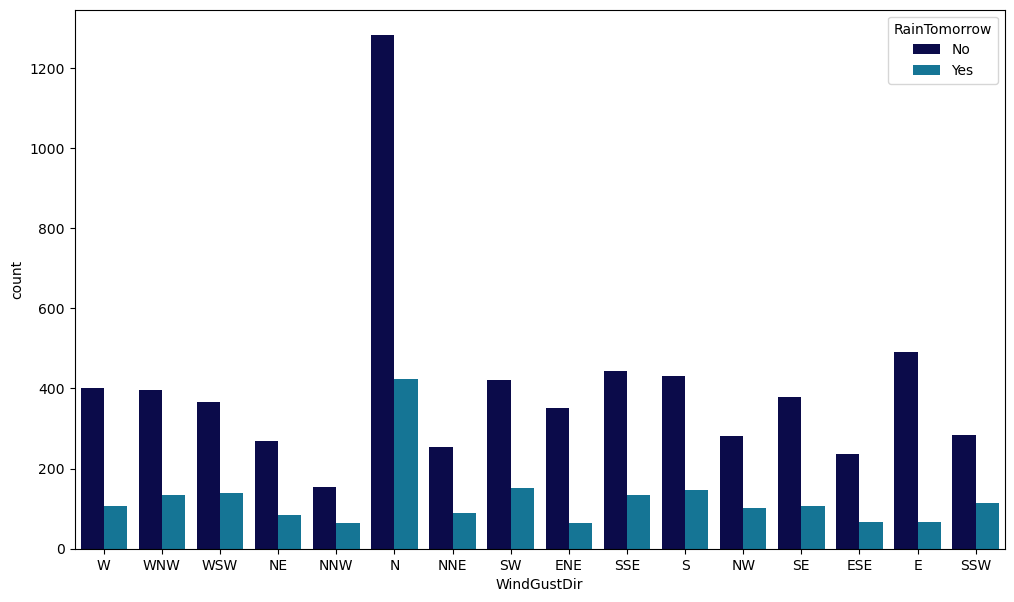

In [52]:
plt.figure(figsize=(12,7))
sns.countplot(x='WindGustDir', hue='RainTomorrow',data=df,palette='ocean')
plt.show()

1. We can see, Wind Gust direction shows that North direction wind may flow. and due to this no rainfall tomorrow. And It has maximum chance that there is no rainfall tomorrow.

2. Similarly, By same wind it also show it might have a chance that there is some rainfall tomorrow. But comapring to no Rainfall it has very less chance to right. So it strongly possible that no rainfalls tomorrow by seen plot.

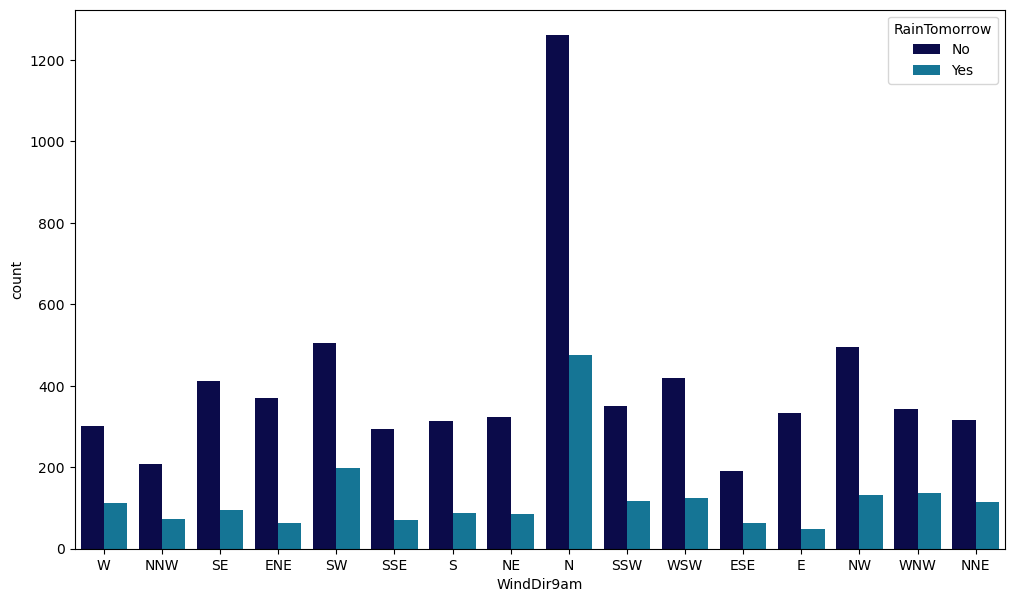

In [53]:
plt.figure(figsize=(12,7))
sns.countplot(x='WindDir9am', hue='RainTomorrow',data=df,palette='ocean')
plt.show()

Wind direction At 9am will be North.Because it show maximum possibility than others. And it also show there is no rainfall tomorroww.
Very less chance will have for rainfall.

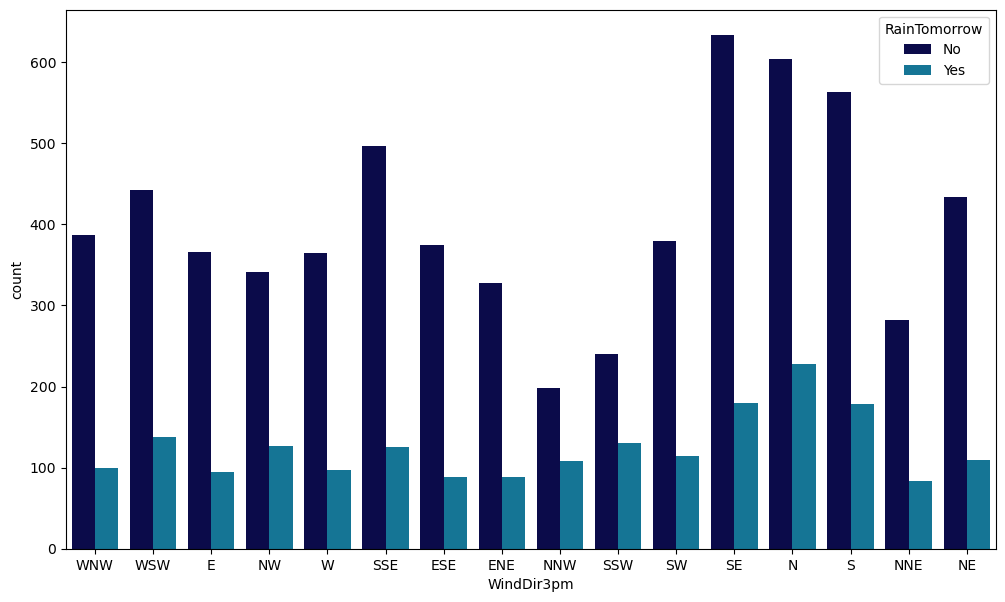

In [55]:
plt.figure(figsize=(12,7))
sns.countplot(x='WindDir3pm', hue='RainTomorrow',data=df,palette='ocean')
plt.show()

We can see, At 3 am Wind direction may be SouthEast. It has maximum possibility that there is mo rainfall tomorrow.
But at same time North wind direction also have more posssiblity that wind will flow tomorrow in North direction.
According to graph there is no rainfall tomorrow.

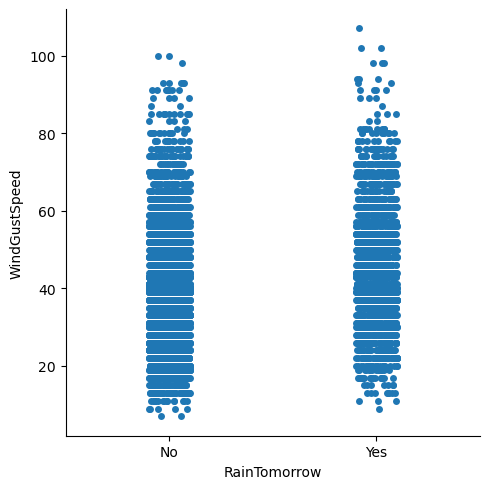

In [56]:
sns.catplot(x='RainTomorrow',y='WindGustSpeed',data=df)
plt.show()

According to Wind gun speed, There are having maximum chance of rainfall tomorrow. But at same time its show also no rainfall tomorrow.
Because both are having almost same proportion so that possibilities also in same proportion.

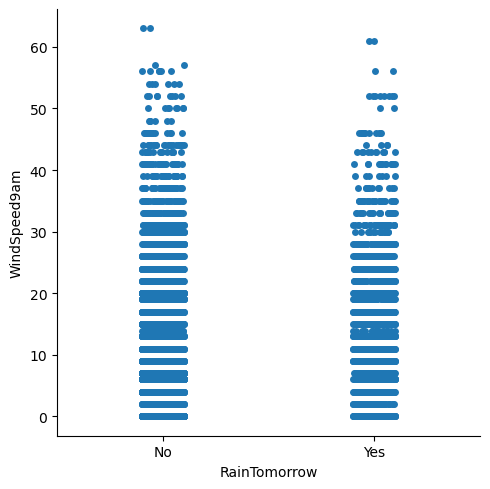

In [57]:
sns.catplot(x='RainTomorrow',y='WindSpeed9am',data=df)
plt.show()

The maximum wind speed at 9 am are > 60. It shows that wind speed will > 60 but possibility for rainfall also low.
But at same time, it show strong posibilities that, there is rainfall tomorrow.

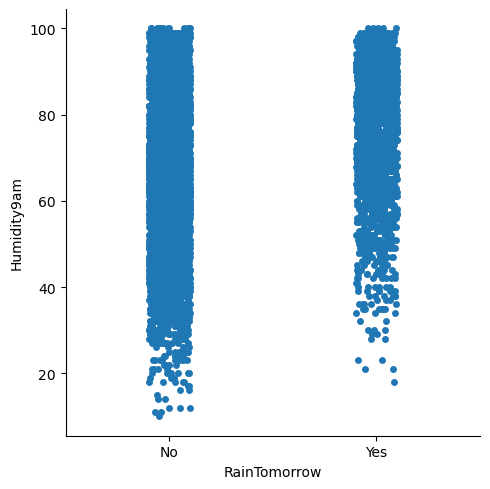

In [58]:
sns.catplot(x='RainTomorrow',y='Humidity9am',data=df)
plt.show()

According to Humidity9am, it show humidity at 9 am will be or almost 100. so possibility so rainfall is high in tomorrow.

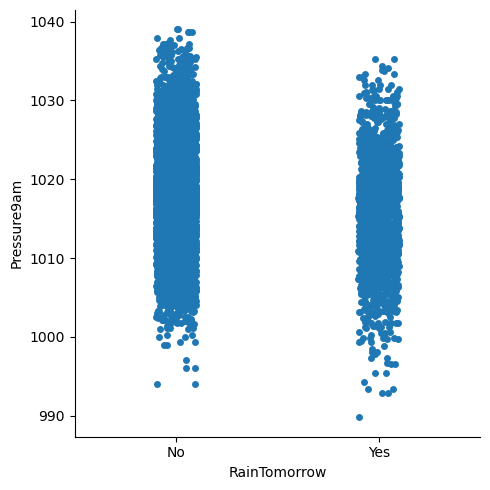

In [59]:
sns.catplot(x='RainTomorrow',y='Pressure9am',data=df)
plt.show()

At 9 am the presure will be more than 1000 hpa so due this there is more possobility that there is no rainfall tomorrow.
But at Same pressure it seem that it has some possibilities that there is rainfall tomorrow.

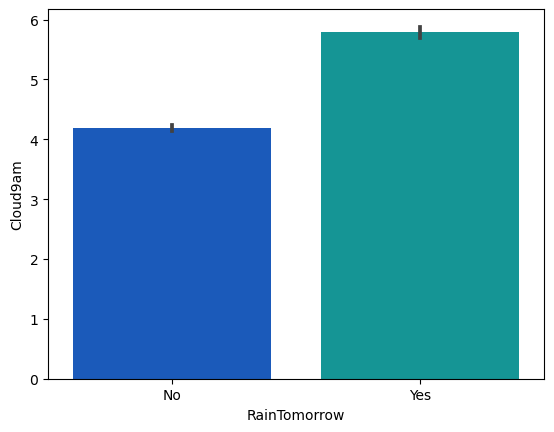

In [61]:
sns.barplot(x='RainTomorrow',y='Cloud9am',data=df,palette='winter')
plt.show()

According to Cloud at 9 am it seem that, there is huge possibilities that there will be rainfall tomorrow.
Fraction of sky obscured is minimum 4 tomorrow.

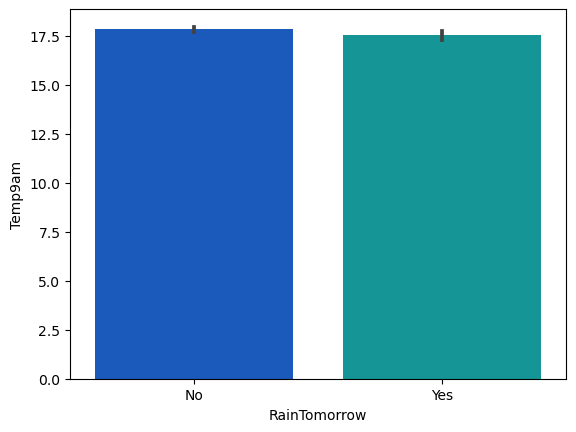

In [62]:
sns.barplot(x='RainTomorrow',y='Temp9am',data=df,palette='winter')
plt.show()

According to Temp at 9 am is having both possibilities equally that rainfall may be or may not be possible.
Average temp is more than 17.5 degree C.

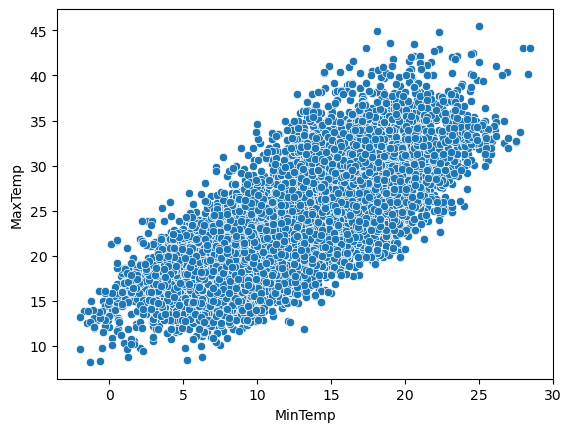

In [63]:
sns.scatterplot(x='MinTemp',y='MaxTemp',data=df)
plt.show()

We can see, both features are having linear relationship with eachothers.
As MinTem drop while MaxTemp increases.

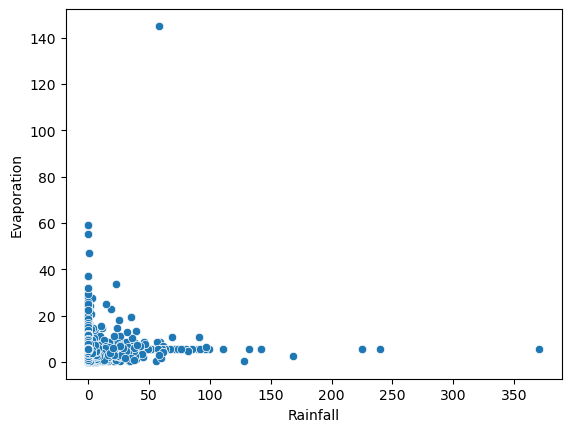

In [65]:
sns.scatterplot(x='Rainfall',y='Evaporation',data=df)
plt.show()

There is no direct relationship betweem rainfall and evaporation.
Maximum evaporation with respect to rainfall is 60. Whereas maximum rianfall with repect to evaporation is 150.

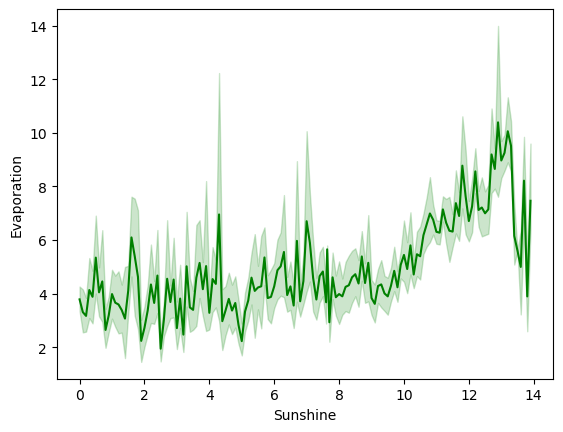

In [68]:
sns.lineplot(x='Sunshine',y='Evaporation',data=df, color='g')
plt.show()

We can see, there is linear relation with each other.
As Sunshine is increases then Evaporation also increases.

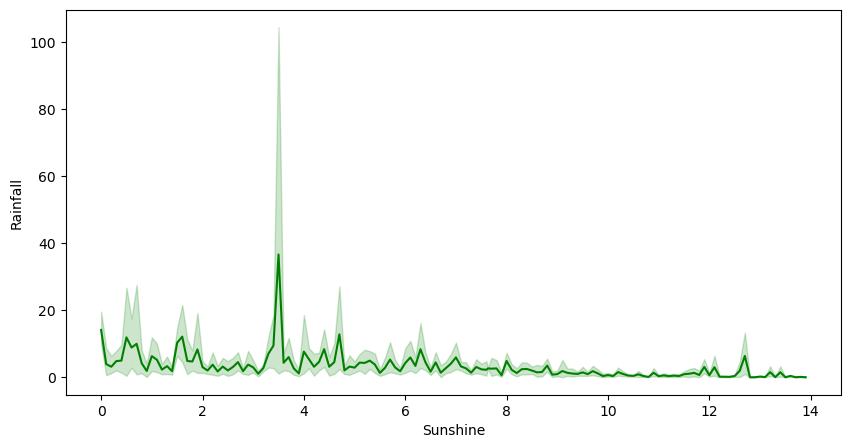

In [70]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='g')
plt.show()

We can see the Sunshine is inversely proportional to Rainfall

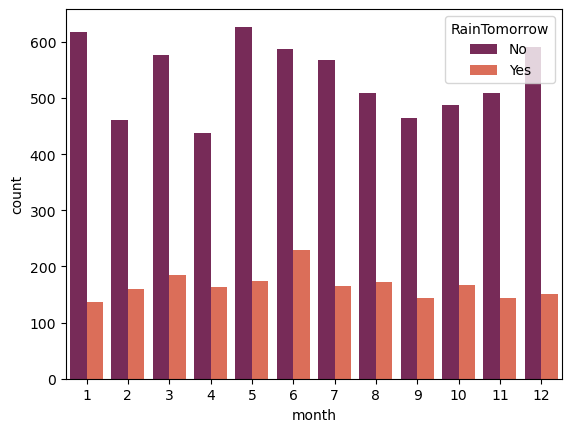

In [73]:
sns.countplot(x='month', hue='RainTomorrow',data=df, palette='rocket')
plt.show()

1. May has maximum possibility of no rainfall. Bwecause the sky is completelty clean in this month and humidity may low so that, no or poor humidity due to this no rainfall in this month.

2. July has high chance of precipitation.

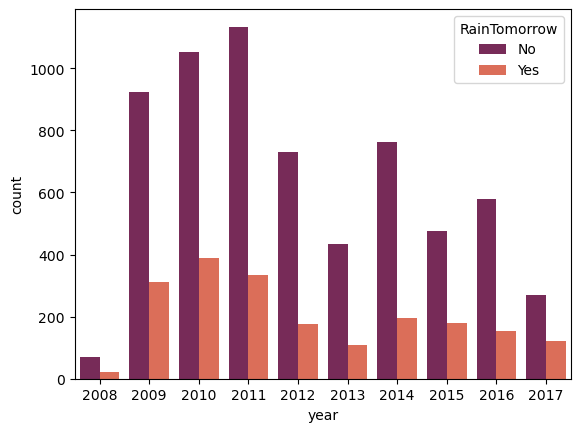

In [74]:
sns.countplot(x='year',hue='RainTomorrow',data=df, palette='rocket')
plt.show()

In 2010 there is high rainfall than others year. Bu we can observed here precipitation rate is decreasing.
Due to this prediction of rainfall also decreasing.

In [20]:
# Encoding the data:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df_cols=("Location","WindGustDir","WindDir9am","WindDir3pm",'WindDir3pm',"RainToday",'RainTomorrow')
for i in df_cols:
    df[i]=le.fit_transform(df[i])

In [19]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [22]:
df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.012324
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
year              0.418663
month             0.039388
day               0.004260
dtype: float64

1. Outcome of the skewness: Skewness threshold is taken is +/-0.65.

2. RainFall, Evaporation, WindSpeed9am and RainToday are having skewness.

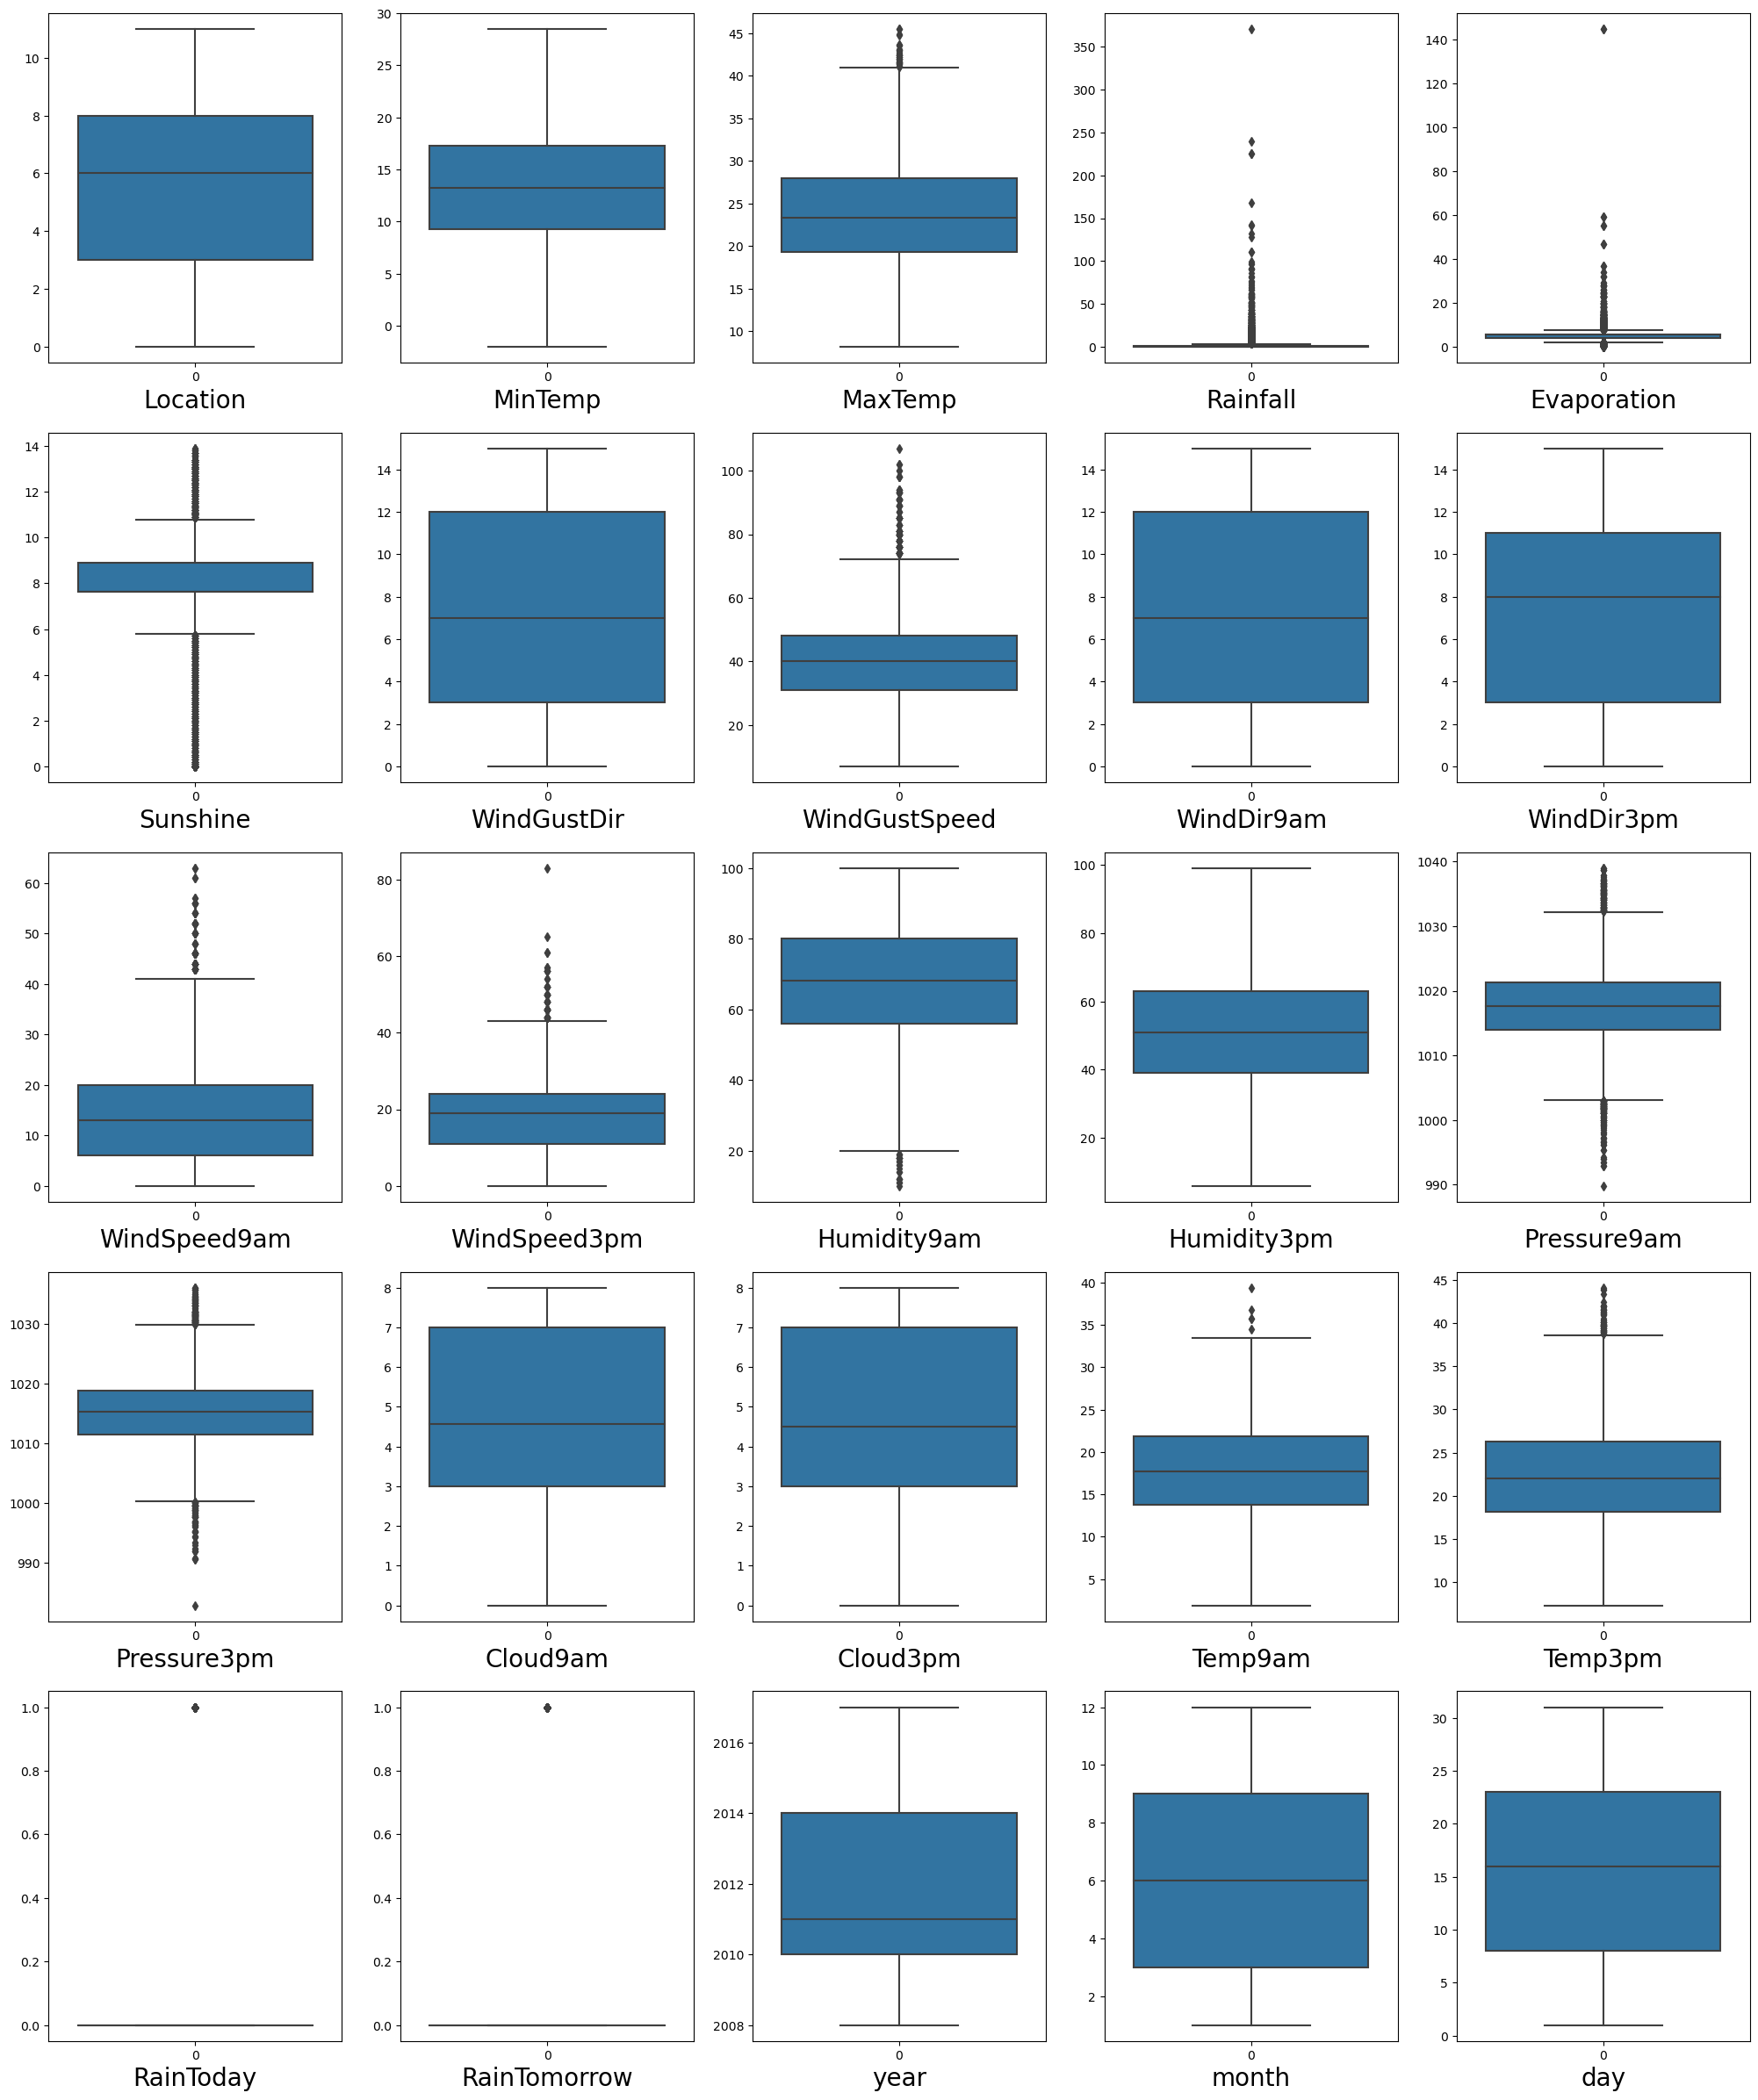

In [87]:
# Checking Outliers

plt.figure(figsize=(25,30))
plotnumber = 1

for column in df:
    if plotnumber <=25:
        plt.subplot(5,5,plotnumber)
        ax = sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

1. MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temppam and Temp3pm are having a more Outliers.

2. Some feature are not having outliers but those are categorical features.

In [23]:
# Removing Outliers

from scipy.stats import zscore

z_score = zscore(df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score  < 3).all(axis=1)

df1 = df[filtering_entry]

In [24]:
df1.shape

(7987, 25)

In [25]:
df.shape

(8425, 25)

In [26]:
# Calculating percentage of loss:

data_loss = ((8425 - 7987)/8425*100)
print(data_loss,'%')

5.198813056379822 %


In [27]:
# Dividing into Feature and Target data
x=df1.drop(['RainTomorrow'],axis=1)
y=df1['RainTomorrow']

In [28]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
x=SDC.fit_transform(x)

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
from imblearn.over_sampling import SMOTE as sm

X,Y = sm().fit_resample(x,y)

In [31]:
Y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

# Finding Best Random State

In [30]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,50):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state= i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.7834549878345499 at random state  17


# Training & Testing of Data

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=17)

# Applying various models

In [47]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predlg),'%')

for i in range(2,11):
    cvs = cross_val_score(lg,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predlg))
print('\n Classification Report: \n',classification_report(y_test,predlg))

Accuracy score is:  0.7756150310894836 %
Cross Validation Score for cv= 2 is 0.7966739114431728
Cross Validation Score for cv= 3 is 0.8190798881143767
Cross Validation Score for cv= 4 is 0.8165805195769607
Cross Validation Score for cv= 5 is 0.8232133466770847
Cross Validation Score for cv= 6 is 0.81970296743024
Cross Validation Score for cv= 7 is 0.8198322273694755
Cross Validation Score for cv= 8 is 0.8218356131682785
Cross Validation Score for cv= 9 is 0.8268484098529194
Cross Validation Score for cv= 10 is 0.8243481043033114

 Confusion Matrix: 
 [[1506  389]
 [ 441 1363]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1895
           1       0.78      0.76      0.77      1804

    accuracy                           0.78      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.78      0.78      0.78      3699



In [33]:
# Using SVC model:

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predsvc),'%')

for i in range(2,15):
    cvs = cross_val_score(svc,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predsvc))
print('\n Classification Report: \n',classification_report(y_test,predsvc))

Accuracy score is:  0.8653690186536902 %
Cross Validation Score for cv= 2 is 0.7857827311967199
Cross Validation Score for cv= 3 is 0.8204583800847879
Cross Validation Score for cv= 4 is 0.7954221537717399
Cross Validation Score for cv= 5 is 0.826593119295174
Cross Validation Score for cv= 6 is 0.8002943777737167
Cross Validation Score for cv= 7 is 0.8235883310379367
Cross Validation Score for cv= 8 is 0.8352345331303248
Cross Validation Score for cv= 9 is 0.839618508023243
Cross Validation Score for cv= 10 is 0.8351079513552341
Cross Validation Score for cv= 11 is 0.8346046434079447
Cross Validation Score for cv= 12 is 0.8443725680567784
Cross Validation Score for cv= 13 is 0.8414933600601354
Cross Validation Score for cv= 14 is 0.8406210359524028

 Confusion Matrix: 
 [[1595  300]
 [ 198 1606]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      1895
           1       0.84      0.89      0.87      1804

 

In [34]:
# Using KNN model:

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predkn),'%')

for i in range(2,15):
    cvs = cross_val_score(kn,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predkn))
print('\n Classification Report: \n',classification_report(y_test,predkn))

Accuracy score is:  0.8613138686131386 %
Cross Validation Score for cv= 2 is 0.765871039215974
Cross Validation Score for cv= 3 is 0.7982990605320482
Cross Validation Score for cv= 4 is 0.7706325269467327
Cross Validation Score for cv= 5 is 0.7999255487643837
Cross Validation Score for cv= 6 is 0.7900312972627023
Cross Validation Score for cv= 7 is 0.797671215725554
Cross Validation Score for cv= 8 is 0.8074417102473215
Cross Validation Score for cv= 9 is 0.8108229424463923
Cross Validation Score for cv= 10 is 0.8129447523690327
Cross Validation Score for cv= 11 is 0.8133184241611265
Cross Validation Score for cv= 12 is 0.8163315571210309
Cross Validation Score for cv= 13 is 0.8155799736398769
Cross Validation Score for cv= 14 is 0.8160833344306475

 Confusion Matrix: 
 [[1456  439]
 [  74 1730]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.77      0.85      1895
           1       0.80      0.96      0.87      1804

 

In [35]:
# Using Decision Tree model:

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,preddtc),'%')

for i in range(2,15):
    cvs = cross_val_score(dtc,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,preddtc))
print('\n Classification Report: \n',classification_report(y_test,preddtc))

Accuracy score is:  0.8729386320627196 %
Cross Validation Score for cv= 2 is 0.7091576508263522
Cross Validation Score for cv= 3 is 0.757858593883645
Cross Validation Score for cv= 4 is 0.6965192904587342
Cross Validation Score for cv= 5 is 0.7884082560934418
Cross Validation Score for cv= 6 is 0.7443354323519613
Cross Validation Score for cv= 7 is 0.7781394766495556
Cross Validation Score for cv= 8 is 0.8069669118015811
Cross Validation Score for cv= 9 is 0.8123461680395164
Cross Validation Score for cv= 10 is 0.8239367191445448
Cross Validation Score for cv= 11 is 0.8262294297000494
Cross Validation Score for cv= 12 is 0.8300936274620486
Cross Validation Score for cv= 13 is 0.831640500068243
Cross Validation Score for cv= 14 is 0.8410055348528941

 Confusion Matrix: 
 [[1658  237]
 [ 233 1571]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1895
           1       0.87      0.87      0.87      1804

 

In [36]:
# Using Random Forest classifier:

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predRF),'%')

for i in range(2,15):
    cvs = cross_val_score(RF,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predRF))
print('\n Classification Report: \n',classification_report(y_test,predRF))

Accuracy score is:  0.9321438226547716 %
Cross Validation Score for cv= 2 is 0.8083180054328927
Cross Validation Score for cv= 3 is 0.8366124006534529
Cross Validation Score for cv= 4 is 0.7994304834004513
Cross Validation Score for cv= 5 is 0.8446222305119973
Cross Validation Score for cv= 6 is 0.8153203917666727
Cross Validation Score for cv= 7 is 0.854763991486165
Cross Validation Score for cv= 8 is 0.8760626859324254
Cross Validation Score for cv= 9 is 0.8877081704026462
Cross Validation Score for cv= 10 is 0.893188854489164
Cross Validation Score for cv= 11 is 0.8809355505559765
Cross Validation Score for cv= 12 is 0.8824237771606193
Cross Validation Score for cv= 13 is 0.884588087424347
Cross Validation Score for cv= 14 is 0.8979772109784091

 Confusion Matrix: 
 [[1760  135]
 [ 116 1688]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      1895
           1       0.93      0.94      0.93      1804

  

In [37]:
# Using AdaBoost classifier:

from sklearn.ensemble import AdaBoostClassifier
Ad=AdaBoostClassifier()
Ad.fit(x_train,y_train)
predAd=Ad.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predAd),'%')

for i in range(2,15):
    cvs = cross_val_score(Ad,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predAd))
print('\n Classification Report: \n',classification_report(y_test,predAd))

Accuracy score is:  0.8283319816166531 %
Cross Validation Score for cv= 2 is 0.7551109722434892
Cross Validation Score for cv= 3 is 0.7987996079131721
Cross Validation Score for cv= 4 is 0.7529844992940313
Cross Validation Score for cv= 5 is 0.8051822762172189
Cross Validation Score for cv= 6 is 0.7552165238115651
Cross Validation Score for cv= 7 is 0.8073118818079379
Cross Validation Score for cv= 8 is 0.808436066326848
Cross Validation Score for cv= 9 is 0.8243436503019367
Cross Validation Score for cv= 10 is 0.8140736697814625
Cross Validation Score for cv= 11 is 0.8015440363138933
Cross Validation Score for cv= 12 is 0.8075526654474023
Cross Validation Score for cv= 13 is 0.8026684022791117
Cross Validation Score for cv= 14 is 0.8167180209718692

 Confusion Matrix: 
 [[1580  315]
 [ 320 1484]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1895
           1       0.82      0.82      0.82      1804



In [38]:
# Using GuasianNB classifier:

from sklearn.naive_bayes import GaussianNB
Gu=GaussianNB()
Gu.fit(x_train,y_train)
predGu=Gu.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predGu),'%')

for i in range(2,15):
    cvs = cross_val_score(Gu,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predGu))
print('\n Classification Report: \n',classification_report(y_test,predGu))

Accuracy score is:  0.7502027575020276 %
Cross Validation Score for cv= 2 is 0.7528498169242344
Cross Validation Score for cv= 3 is 0.7783884189370451
Cross Validation Score for cv= 4 is 0.7668810329723041
Cross Validation Score for cv= 5 is 0.7808917377153503
Cross Validation Score for cv= 6 is 0.772376151508383
Cross Validation Score for cv= 7 is 0.7841492425190936
Cross Validation Score for cv= 8 is 0.780889356290158
Cross Validation Score for cv= 9 is 0.7825206830280111
Cross Validation Score for cv= 10 is 0.7806656817262179
Cross Validation Score for cv= 11 is 0.7833932903902325
Cross Validation Score for cv= 12 is 0.7845347226926176
Cross Validation Score for cv= 13 is 0.7830148321528316
Cross Validation Score for cv= 14 is 0.7830216960966341

 Confusion Matrix: 
 [[1480  415]
 [ 509 1295]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      1895
           1       0.76      0.72      0.74      1804

 

In [48]:
# Using XG Booster:

from xgboost import XGBClassifier
XG=XGBClassifier()
XG.fit(x_train,y_train)
predXG=XG.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predXG),'%')

for i in range(2,15):
    cvs = cross_val_score(XG,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predXG))
print('\n Classification Report: \n',classification_report(y_test,predXG))

Accuracy score is:  0.9426872127602055 %
Cross Validation Score for cv= 2 is 0.786535644939987
Cross Validation Score for cv= 3 is 0.8165807718896728
Cross Validation Score for cv= 4 is 0.7561154482224338
Cross Validation Score for cv= 5 is 0.8270924911618545
Cross Validation Score for cv= 6 is 0.765862782391708
Cross Validation Score for cv= 7 is 0.8088143232753225
Cross Validation Score for cv= 8 is 0.8409975606869394
Cross Validation Score for cv= 9 is 0.8493908226151743
Cross Validation Score for cv= 10 is 0.8602429101539831
Cross Validation Score for cv= 11 is 0.8659113214287314
Cross Validation Score for cv= 12 is 0.8590112669060037
Cross Validation Score for cv= 13 is 0.8619134923496566
Cross Validation Score for cv= 14 is 0.8642876894512991

 Confusion Matrix: 
 [[1793  102]
 [ 110 1694]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1895
           1       0.94      0.94      0.94      1804

 

# Hyper Parameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500,800,950]}

In [37]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
r=Ridge()
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('Mean Squred Error ',mean_squared_error(y_test,y_pred))
print('Root mean squred ',mean_squared_error(y_test,y_pred,squared=False))
print('mean absolute error ',mean_absolute_error(y_test,y_pred))

Mean Squred Error  0.15354903458096783
Root mean squred  0.3918533329971404
mean absolute error  0.329753061538795


In [40]:
Grid_search =  GridSearchCV(r, param_grid=ridge_params)

In [41]:
Grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [200, 230, 250, 265, 270, 275, 290, 300, 500,
                                   800, 950]})

In [42]:
print(Grid_search.best_params_)

{'alpha': 200}


In [43]:
grid_predictions =Grid_search.predict(x_test)

In [44]:
grid_predictions

print('Mean Squred Error is ',mean_squared_error(y_test,grid_predictions))
print('Root mean squred is',mean_squared_error(y_test,grid_predictions,squared=False))
print('mean absolute error is ',mean_absolute_error(y_test,grid_predictions))

Mean Squred Error is  0.15351707807142695
Root mean squred is 0.39181255476493726
mean absolute error is  0.3311289428292891


# AUC ROC Curve:

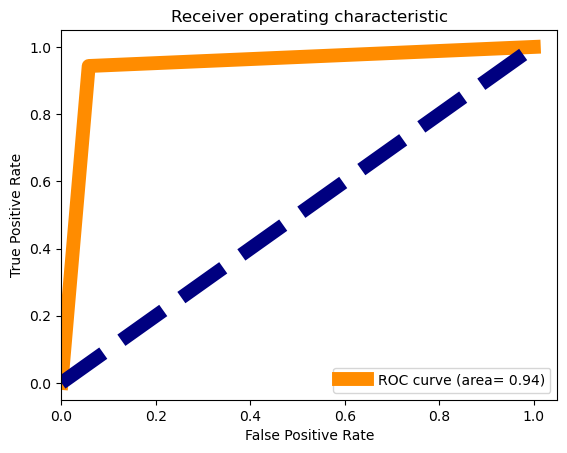

In [53]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(predXG, y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the model

In [50]:
import joblib
joblib.dump(XG,'Project_Rainfall_weather_forecasting.pkl')

['Project_Rainfall_weather_forecasting.pkl']

# Predicting the saved model

In [51]:
model=joblib.load('Project_Rainfall_weather_forecasting.pkl')

#Prediction
prediction=model.predict(x_test)
prediction

array([0, 1, 1, ..., 1, 1, 1])

# 2. Predicting how much Rainfall would be there

In [54]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [55]:
x = df.drop(columns=['Rainfall'],axis=1)
y = df['Rainfall']

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [58]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [59]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.57286976,  0.04112367, -0.07714137, ..., -1.66509984,
         1.51140913, -1.89336522],
       [-1.57286976, -1.07628109,  0.28034646, ..., -1.66509984,
         1.51140913, -1.71075845],
       [-1.57286976, -0.05171292,  0.3743678 , ..., -1.66509984,
         1.51140913, -1.54413081],
       ...,
       [ 1.00253169, -1.45084117,  0.55830718, ...,  1.97552066,
        -0.0533197 ,  0.83338099],
       [ 1.00253169, -1.00152086,  0.5733979 , ...,  1.97552066,
        -0.0533197 ,  0.93203309],
       [ 1.00253169,  0.31938327,  0.08141189, ...,  1.97552066,
        -0.0533197 ,  1.02962993]])

# Finding Best Random State

In [60]:
#Finding the best random state

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state= i)
    le=LinearRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.32007130218846125 at random state  50


# Training & Testing of Data

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [64]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression

lg=LinearRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predlg))

for i in range(2,15):
    cvs = cross_val_score(lg,x, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predlg))
print('\n Mean squared error:',mean_squared_error(y_test,predlg))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predlg)))

r2 accuracy score is:  0.32007130218846125
Cross Validation Score for cv= 2 is 0.1260600604534809
Cross Validation Score for cv= 3 is 0.24094476596396378
Cross Validation Score for cv= 4 is 0.22063641817109433
Cross Validation Score for cv= 5 is 0.24472732676267853
Cross Validation Score for cv= 6 is 0.24695926384700065
Cross Validation Score for cv= 7 is 0.2352740892589448
Cross Validation Score for cv= 8 is 0.25626617209637037
Cross Validation Score for cv= 9 is 0.24905866156778877
Cross Validation Score for cv= 10 is 0.2556521746057049
Cross Validation Score for cv= 11 is 0.25088748985117515
Cross Validation Score for cv= 12 is 0.25510693519617894
Cross Validation Score for cv= 13 is 0.25281226247208316
Cross Validation Score for cv= 14 is 0.2586448409720032

 Mean absolute error: 3.1132603680511286

 Mean squared error: 44.1772709531902

 Root Mean squared error: 6.646598449823053


In [65]:
# Using Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predRF))

for i in range(2,10):
    cvs = cross_val_score(RF,x, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predRF))
print('\n Mean squared error:',mean_squared_error(y_test,predRF))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predRF)))

r2 accuracy score is:  0.4451593031858877
Cross Validation Score for cv= 2 is -0.49917729302033237
Cross Validation Score for cv= 3 is 0.2902818636345769
Cross Validation Score for cv= 4 is 0.2506149092644388
Cross Validation Score for cv= 5 is 0.4605838107707808
Cross Validation Score for cv= 6 is 0.43015795043338656
Cross Validation Score for cv= 7 is 0.4583682206347769
Cross Validation Score for cv= 8 is 0.504805867354774
Cross Validation Score for cv= 9 is 0.4587479461741336

 Mean absolute error: 1.8130376665886965

 Mean squared error: 36.049879756373954

 Root Mean squared error: 6.004155207552013


In [67]:
# Using XGB Regression

from xgboost import XGBRegressor
xb=XGBRegressor()
xb.fit(x_train,y_train)
predxb=xb.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predxb))

for i in range(2,8):
    cvs = cross_val_score(xb,x, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predxb))
print('\n Mean squared error:',mean_squared_error(y_test,predxb))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predxb)))

r2 accuracy score is:  0.28443273301659133
Cross Validation Score for cv= 2 is -0.6958207552309699
Cross Validation Score for cv= 3 is 0.2602125573007921
Cross Validation Score for cv= 4 is 0.1997054914714485
Cross Validation Score for cv= 5 is 0.4212825900428908
Cross Validation Score for cv= 6 is 0.4367456064156712
Cross Validation Score for cv= 7 is 0.4875329643929685

 Mean absolute error: 1.9662040414564055

 Mean squared error: 46.49282952831319

 Root Mean squared error: 6.818565063729552


In [68]:
# Using Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,preddt))

for i in range(2,15):
    cvs = cross_val_score(dt,x, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,preddt))
print('\n Mean squared error:',mean_squared_error(y_test,preddt))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddt)))

r2 accuracy score is:  -0.7989768941206135
Cross Validation Score for cv= 2 is -2.2364461682820407
Cross Validation Score for cv= 3 is -0.2830926894913501
Cross Validation Score for cv= 4 is -0.6687735263762995
Cross Validation Score for cv= 5 is 0.22072204169746526
Cross Validation Score for cv= 6 is 0.04251176275640928
Cross Validation Score for cv= 7 is 0.18734721056986414
Cross Validation Score for cv= 8 is -0.8116066172793954
Cross Validation Score for cv= 9 is -0.5386483769350106
Cross Validation Score for cv= 10 is -0.340170804247969
Cross Validation Score for cv= 11 is 0.07765252144503462
Cross Validation Score for cv= 12 is -0.18862742036918545
Cross Validation Score for cv= 13 is 0.0626510045898528
Cross Validation Score for cv= 14 is -0.8758197611262153

 Mean absolute error: 2.130228951926571

 Mean squared error: 116.88562336888349

 Root Mean squared error: 10.8113654719875


In [69]:
# Using Linear Regression

from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
predKNR=KNR.predict(x_test)
print("r2 accuracy score is: ",r2_score(y_test,predKNR))

for i in range(2,8):
    cvs = cross_val_score(KNR,x, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predKNR))
print('\n Mean squared error:',mean_squared_error(y_test,predKNR))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predKNR)))

r2 accuracy score is:  0.2658779956715617
Cross Validation Score for cv= 2 is 0.16931931355581392
Cross Validation Score for cv= 3 is 0.2859436769005512
Cross Validation Score for cv= 4 is 0.25107377265071446
Cross Validation Score for cv= 5 is 0.31386079705427367
Cross Validation Score for cv= 6 is 0.27473688984385203
Cross Validation Score for cv= 7 is 0.2754911045854559

 Mean absolute error: 2.2246688021465633

 Mean squared error: 47.69839367319335

 Root Mean squared error: 6.9064023683241444


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [71]:
rf = RandomForestRegressor()

In [72]:
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,4,6,8,10],
             'min_samples_leaf':[1,3,4,5,6,7],
             'max_depth':[5,10,15],
             }

In [73]:
grd = GridSearchCV(rf,param_grid=parameters)

In [77]:
rf = RandomForestRegressor(min_samples_split=2, min_samples_leaf=1,n_estimators=500,max_features='log2')
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(r2_score(y_test,y_pred))

0.5518194419006895


# Saving the model

In [78]:
import joblib
joblib.dump(rf,"rainfall.pkl")

['rainfall.pkl']

# Loading The Model

In [80]:
model=joblib.load('rainfall.pkl')

#Prediction
prediction=model.predict(x_test)
prediction

array([4.18236530e-02, 1.71378237e+01, 3.00236530e-02, ...,
       1.13601156e+00, 4.12354795e-02, 4.00000000e-04])